# Dual Harmonic Kelvin Probe Force Microscopy

Code by: Marti Checa

CNMS User project: "Understanding the electronic interaction at the graphene-electrolyte interface". Main user: Marta Delga, ICN2, Barcelona, Spain.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading data and calculating CPD

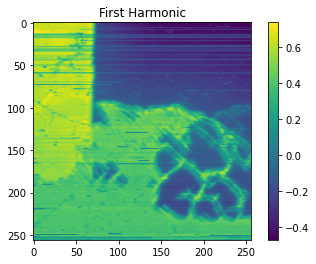

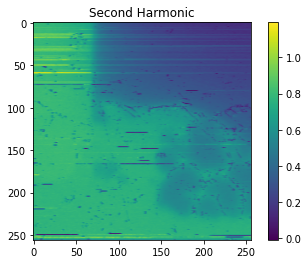

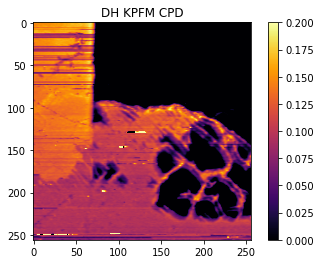

In [2]:
#Paremeters
Xgain=1.34
Vac=1

#File names and paths
path_file_w = r"C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\MQ_1V_25KHz0001NapUserIn0Retrace.txt"
path_file_2w = r"C:\Users\3un\Desktop\Jupyter Notebooks\Github notebooks\Data for them\MQ_1V_25KHz0001NapUserIn1Retrace.txt"

#Read data
data_w=np.loadtxt(path_file_w)
data_2w=np.loadtxt(path_file_2w)

data_w=np.rot90(data_w)
data_2w=np.rot90(data_2w)

#Calculate CPD
V_CPD= (Vac/(4*Xgain))*data_w/(data_2w)

#Plot matrices
f1=plt.figure()
plt.imshow(data_w)
plt.title("First Harmonic")
plt.colorbar()
plt.show()

f2=plt.figure()
plt.imshow(data_2w)
plt.title("Second Harmonic")
plt.colorbar()
plt.show()

f3=plt.figure()
plt.imshow(V_CPD, cmap="inferno",vmin=0, vmax=0.2)
plt.title("DH KPFM CPD")
plt.colorbar()
plt.show()


## K-means Clustering

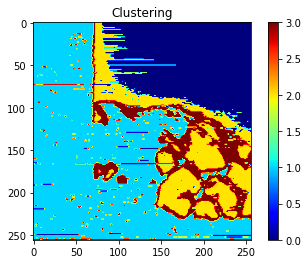

Centroids are:
[[-0.25591731  0.27314198]
 [ 0.46151703  0.76832872]
 [-0.10356469  0.5121737 ]
 [ 0.22241529  0.59231759]]


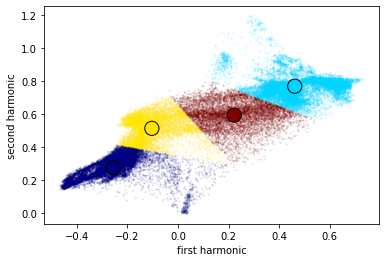

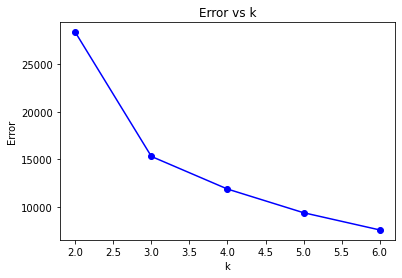

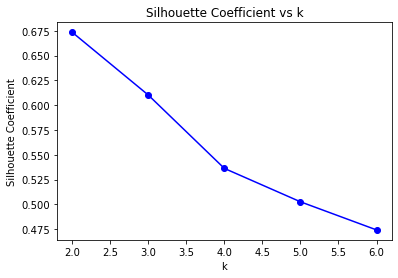

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#image size
Imsize=len(data_w)

#we reshape the matrices into arrays
data_w_vec=np.reshape(data_w,(np.size(data_w)))
data_w_vec = data_w_vec.reshape(-1,1) 
data_2w_vec=np.reshape(data_2w,(np.size(data_2w)))
data_2w_vec = data_2w_vec.reshape(-1,1)

# we prepare the data for the kmeans
data_for_kmeans = np.hstack((data_w_vec,data_2w_vec))
scaler = StandardScaler()
scaler.fit(data_for_kmeans)
Normalized_data = scaler.transform(data_for_kmeans)

# we do the k means
k=4
kmeans= KMeans(n_clusters=k, random_state=4,max_iter=2000).fit(Normalized_data)
labels = np.reshape(kmeans.labels_,(Imsize,Imsize))
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# we plot the classification
f4=plt.figure()
plt.imshow(labels,cmap='jet')
plt.title('Clustering')
plt.colorbar()
plt.show()

#we print the centroids
print('Centroids are:')
print(centroids)

#we plot the clustering
ColorsA = plt.cm.jet(np.linspace(0,1,k),alpha=1)
f5= plt.figure()
plt.scatter(data_for_kmeans[:,0],data_for_kmeans[:,1],s=1, c=kmeans.labels_, cmap='jet',alpha=0.1)
plt.scatter(centroids[:,0],centroids[:,1],c=ColorsA, s=200,edgecolors='k')
plt.xlabel('first harmonic')
plt.ylabel('second harmonic')
plt.show()

#Calcul of error
Number_of_k=6
K_number=np.linspace(2,Number_of_k,(Number_of_k-1))
error=np.empty((Number_of_k-1))
sil_coeff=np.empty((Number_of_k-1))

for i in range(1,(Number_of_k)):
    #print(i)
    kmeans_error = KMeans(n_clusters=i+1, random_state=0).fit(Normalized_data)
    error[i-1]=kmeans_error.inertia_
    sil_coeff[i-1] = silhouette_score(Normalized_data, kmeans_error.labels_, metric='euclidean')

f5=plt.figure()
plt.plot(K_number,error,'bo-')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Error vs k')
plt.show()

f6=plt.figure()
plt.plot(K_number,sil_coeff,'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs k')
plt.show()